#Project 2B2
Yêu cầu dự án:
Xử lý ảnh khủng long Pixel bằng phương pháp hình thái

| Mã số sinh viên| Tên Sinh viên |
|:---------:|:-----------:|
|21064051   | Nguyễn Hùng Anh|
|21120671   | Nguyễn Thành Trung|
|21115991   | Võ Công Đoàn|

## Library

In [ ]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Thresholding

In [ ]:
def threshold(image, threshold=127):
    binary_image = np.zeros_like(image)
    binary_image[image > threshold] = 255
    return binary_image

## 2. Erosion

In [ ]:
def erode(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    padding = kernel_size // 2
    eroded_image = np.zeros_like(image)

    # Duyệt qua từng điểm ảnh của ảnh (trừ vùng padding)
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Lấy vùng lân cận (neighborhood) quanh điểm ảnh hiện tại
            neighborhood = image[i - padding:i + padding + 1, j - padding:j + padding + 1]
            # Đặt giá trị nhỏ nhất của vùng lân cận vào điểm ảnh hiện tại
            eroded_image[i, j] = np.min(neighborhood)
    return eroded_image

## 3. Dilation

In [ ]:
def dilate(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    padding = kernel_size // 2
    dilated_image = np.zeros_like(image)

    # Duyệt qua từng điểm ảnh của ảnh (trừ vùng padding)
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Lấy vùng lân cận (neighborhood) quanh điểm ảnh hiện tại
            neighborhood = image[i - padding:i + padding + 1, j - padding:j + padding + 1]
            # Đặt giá trị lớn nhất của vùng lân cận vào điểm ảnh hiện tại
            dilated_image[i, j] = np.max(neighborhood)
    return dilated_image


## 4. Contour Detection

### Retr_External

In [ ]:
def findContours_RETR_EXTERNAL(binary_color, dilate_color, erode_color):
    result_image = np.zeros_like(binary_color)
    row, col, _ = binary_color.shape

    for i in range(row):
        for j in range(col):
            if(np.array_equal(binary_color[i,j], [0, 0, 0]) and np.array_equal(dilate_color[i,j], [255, 255, 255])):
                result_image[i,j] = [0, 255, 0]
            elif (np.array_equal(binary_color[i,j], [255, 255, 255]) and np.array_equal(dilate_color[i,j], [255, 255, 255])):
                result_image[i,j] = [255, 255, 255]

    for i in range(row):
        for j in range(col):
            if(np.array_equal(result_image[i,j], [0, 255, 0]) and np.array_equal(erode_color[i,j], [255, 255, 255])):
                result_image[i,j] = [0, 0, 0]
    return result_image

### Retr_List

In [ ]:
def findContours_RETR_LIST(dilate_color, erode_color):
    result_image = np.zeros_like(dilate_color)
    row, col, _ = dilate_color.shape

    for i in range(row):
        for j in range(col):
            if(np.array_equal(dilate_color[i,j], [255, 255, 255]) and np.array_equal(erode_color[i,j], [0, 0, 0])):
                result_image[i,j] = [0, 255, 0]
            elif (np.array_equal(dilate_color[i,j], [255, 255, 255]) and np.array_equal(erode_color[i,j], [255, 255, 255])):
                result_image[i,j] = [255, 255, 255]

    return result_image

## 6. Visualization

In [ ]:
image = cv2.imread('/content/drive/MyDrive/XuLyAnh/ImageProject/Dino.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
image = cv2.resize(image, (375, 275))

Retr_External

(-0.5, 374.5, 274.5, -0.5)

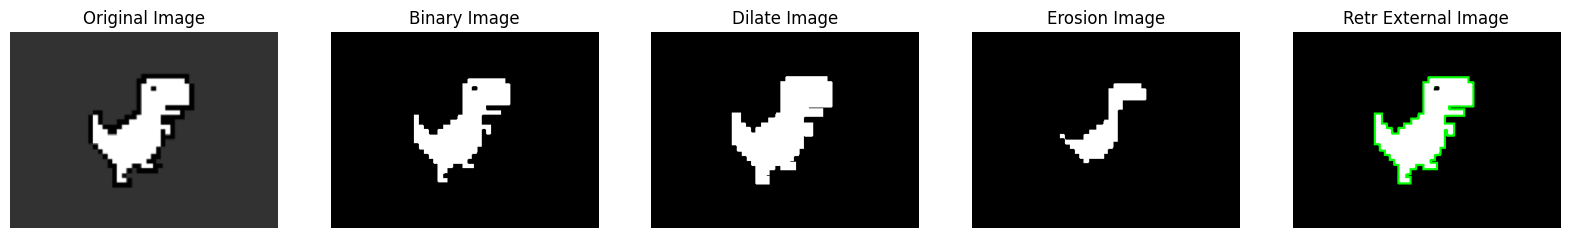

In [ ]:
binary_image = threshold(image, 127)
dilate_image = dilate(binary_image,6)
erode_image = erode(dilate_image,20)

binary_color = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
dilate_color = cv2.cvtColor(dilate_image, cv2.COLOR_GRAY2BGR)
erode_color = cv2.cvtColor(erode_image, cv2.COLOR_GRAY2BGR)

retr_external_image = findContours_RETR_EXTERNAL(binary_color, dilate_color, erode_color)

plt.figure(figsize=(20, 15))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap = "gray")
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(dilate_image, cmap='gray')
plt.title("Dilate Image")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(erode_color, cmap='gray')
plt.title("Erosion Image")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(retr_external_image)
plt.title("Retr External Image")
plt.axis('off')

Retr_LIST

(-0.5, 374.5, 274.5, -0.5)

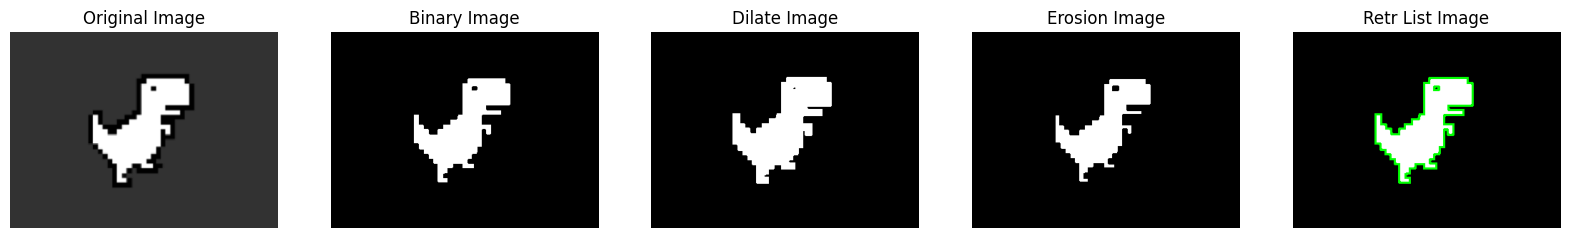

In [ ]:
binary_image = threshold(image, 127)
dilate_image = dilate(binary_image,4)
erode_image = erode(binary_image,2)

binary_color = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
dilate_color = cv2.cvtColor(dilate_image, cv2.COLOR_GRAY2BGR)
erode_color = cv2.cvtColor(erode_image, cv2.COLOR_GRAY2BGR)

retr_list_image = findContours_RETR_LIST(dilate_color, erode_color)

plt.figure(figsize=(20, 15))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap = "gray")
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(dilate_image, cmap='gray')
plt.title("Dilate Image")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(erode_image, cmap='gray')
plt.title("Erosion Image")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(retr_list_image)
plt.title("Retr List Image")
plt.axis('off')

## Compare the original, Retr_external and Retr_list

(-0.5, 374.5, 274.5, -0.5)

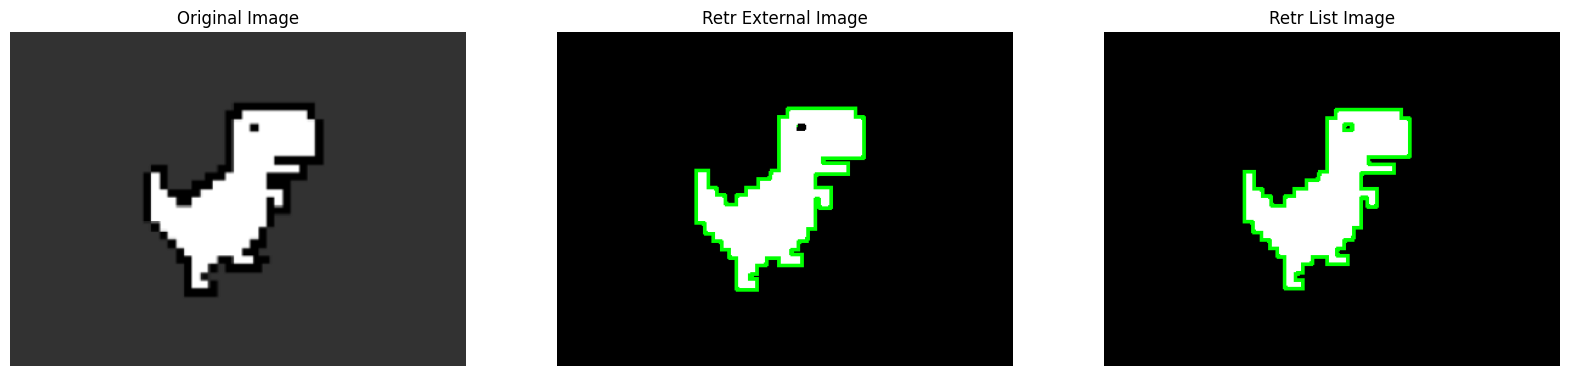

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap = "gray")
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(retr_external_image)
plt.title("Retr External Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(retr_list_image)
plt.title("Retr List Image")
plt.axis('off')